<a href="https://colab.research.google.com/github/Mero928/Machine-Learning/blob/master/Porosity_from_seismic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Porosity prediction using Python and Random forest 

In [1]:
#@title Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

print("Imported modules.")

Imported modules.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#@title Import dataset
df = pd.read_csv("/Data_Edit.csv")

In [3]:
df.tail()

,MD,Phase,Amplitude,App.Polarity,DomFreq,Env,RmsAmp,Sweetness,Variance,Porosity,Porcluster
7519,3790.0,103.4,-199.0,-0.2,0.0,839.6,361.0,839.6,0.3,0.0,NaN
7520,3790.5,103.9,-206.2,-0.2,0.0,836.0,359.2,836.0,0.3,0.0,NaN
7521,3791.0,104.5,-213.4,-0.1,0.0,832.5,357.3,832.5,0.3,0.0,NaN
7522,3791.5,105.1,-220.7,-0.1,0.0,829.1,355.5,829.1,0.3,0.0,NaN
7523,3792.0,105.6,-228.0,-0.1,0.0,825.9,353.6,825.9,0.3,0.0,NaN


In [4]:
#@title Display information about the data file 
display(df.head())
display(df.info())
display(df.tail())
display(df.describe())
display(df.columns)
display(df.shape)

,MD,Phase,Amplitude,App.Polarity,DomFreq,Env,RmsAmp,Sweetness,Variance,Porosity,Porcluster
0,30.0,180.0,0.0,0.0,0.0,0.0,310.9,0.0,0.1,0.0,NaN
1,30.5,180.0,0.0,0.0,0.0,0.0,310.9,0.0,0.1,0.0,NaN
2,31.0,180.0,0.0,0.0,0.0,0.0,310.9,0.0,0.1,0.0,NaN
3,31.5,180.0,0.0,0.0,0.0,0.0,310.9,0.0,0.1,0.0,NaN
4,32.0,168.5,31.5,0.0,0.0,32.1,310.4,32.1,0.1,0.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7524 entries, 0 to 7523
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MD            7524 non-null   float64
 1   Phase         7524 non-null   float64
 2   Amplitude     7524 non-null   float64
 3   App.Polarity  7524 non-null   float64
 4   DomFreq       7524 non-null   float64
 5   Env           7524 non-null   float64
 6   RmsAmp        7524 non-null   float64
 7   Sweetness     7524 non-null   float64
 8   Variance      7524 non-null   float64
 9   Porosity      7524 non-null   float64
 10  Porcluster    3537 non-null   object 
dtypes: float64(10), object(1)
memory usage: 646.7+ KB


None

,MD,Phase,Amplitude,App.Polarity,DomFreq,Env,RmsAmp,Sweetness,Variance,Porosity,Porcluster
7519,3790.0,103.4,-199.0,-0.2,0.0,839.6,361.0,839.6,0.3,0.0,NaN
7520,3790.5,103.9,-206.2,-0.2,0.0,836.0,359.2,836.0,0.3,0.0,NaN
7521,3791.0,104.5,-213.4,-0.1,0.0,832.5,357.3,832.5,0.3,0.0,NaN
7522,3791.5,105.1,-220.7,-0.1,0.0,829.1,355.5,829.1,0.3,0.0,NaN
7523,3792.0,105.6,-228.0,-0.1,0.0,825.9,353.6,825.9,0.3,0.0,NaN


,MD,Phase,Amplitude,App.Polarity,DomFreq,Env,RmsAmp,Sweetness,Variance,Porosity
count,7524.0,7524.0,7524.0,7524.0,7524.0,7524.0,7524.0,7524.0,7524.0,7524.0
mean,1911.0,-1.6,3.8,-0.0,0.0,2436.1,1790.5,2436.1,0.2,1.4
std,1086.2,92.2,2242.3,0.2,0.0,2130.5,1463.9,2130.5,0.1,3.9
min,30.0,-178.2,-9133.5,-1.0,0.0,0.0,113.5,0.0,0.0,0.0
25%,970.5,-81.1,-941.6,0.0,0.0,1045.0,798.8,1045.0,0.1,0.0
50%,1911.0,-0.8,-71.5,0.0,0.0,1796.1,1294.2,1796.1,0.2,0.0
75%,2851.5,78.1,1037.2,0.0,0.0,2986.7,2247.4,2986.7,0.2,0.0
max,3792.0,180.0,12641.0,0.9,0.0,12832.6,8769.5,12832.6,0.9,27.9


Index(['MD', 'Phase', 'Amplitude', 'App.Polarity', 'DomFreq', 'Env', 'RmsAmp',
       'Sweetness', 'Variance', 'Porosity', 'Porcluster'],
      dtype='object')

(7524, 11)

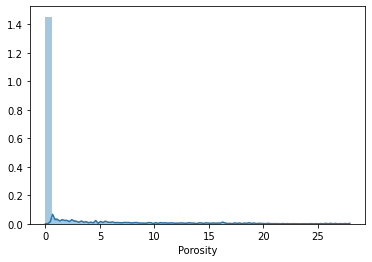

In [5]:
sns.distplot(df['Porosity'])

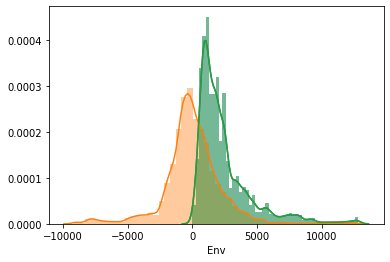

In [6]:
sns.distplot(df['Sweetness'])
sns.distplot(df['Amplitude'])
sns.distplot(df['Env'])

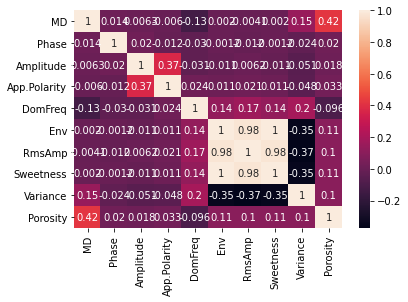

In [7]:
#@title Plot correlation matrix to show relations between features
sns.heatmap(df.corr(),annot=True)

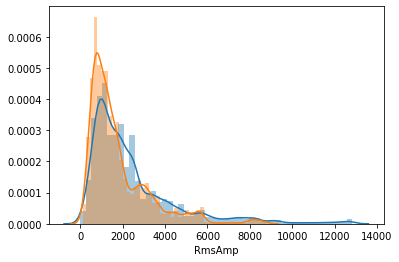

In [8]:
sns.distplot(df['Env'])
sns.distplot(df['RmsAmp'])

In [9]:
df.corr()

,MD,Phase,Amplitude,App.Polarity,DomFreq,Env,RmsAmp,Sweetness,Variance,Porosity
MD,1.0,0.0,0.0,-0.0,-0.1,0.0,-0.0,0.0,0.1,0.4
Phase,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
Amplitude,0.0,0.0,1.0,0.4,-0.0,-0.0,0.0,-0.0,-0.1,0.0
App.Polarity,-0.0,-0.0,0.4,1.0,0.0,0.0,0.0,0.0,-0.0,0.0
DomFreq,-0.1,-0.0,-0.0,0.0,1.0,0.1,0.2,0.1,0.2,-0.1
Env,0.0,-0.0,-0.0,0.0,0.1,1.0,1.0,1.0,-0.3,0.1
RmsAmp,-0.0,-0.0,0.0,0.0,0.2,1.0,1.0,1.0,-0.4,0.1
Sweetness,0.0,-0.0,-0.0,0.0,0.1,1.0,1.0,1.0,-0.3,0.1
Variance,0.1,-0.0,-0.1,-0.0,0.2,-0.3,-0.4,-0.3,1.0,0.1
Porosity,0.4,0.0,0.0,0.0,-0.1,0.1,0.1,0.1,0.1,1.0


In [21]:
#@title Define dataset and Prediction Yhat

Xdf = df[['MD', 'Phase', 'Amplitude', 'App.Polarity', 'DomFreq', 'Env', 'Variance']]
y = df['Porosity']       

In [22]:
print("Yhat shapes of: ",y.shape)
print("Xdf shapes of: ",Xdf.shape)

Yhat shapes of:  (7524,)
Xdf shapes of:  (7524, 7)


In [23]:
#@title Train test split 25%
X_train, X_test, y_train, y_test = train_test_split(Xdf, y, test_size=0.2, random_state=101)

In [24]:
#@title Linear Regression model training
lm = LinearRegression()
train_sizes, train_scores, test_scores = learning_curve(estimator=lm,
                                                        X=X_train,
                                                        y=y_train,
                                                        scoring = 'neg_mean_squared_error',
                                                       cv=3)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
#@title Model evaluation - RMSE
predictions = lm.predict(X_test)
error=np.sqrt(mean_squared_error(y_test,predictions)) # rmse
print("RMSE : ",error)

RMSE :  3.6035152349438366


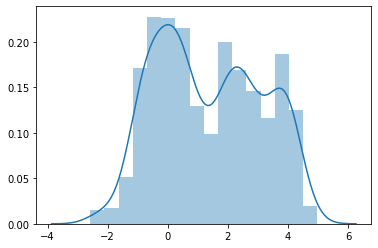

In [26]:
#@title Model evaluation - prediction histogram
sns.distplot(predictions)

In [95]:
#@title Print model coefficients 
print("intercept : ",lm.intercept_)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[idx]))

intercept :  -0.0961419241782958
The coefficient for MD is 0.18768802722217257
The coefficient for Phase is 0.012446133729867637
The coefficient for Amplitude is 0.0029681866624303647
The coefficient for App.Polarity is 0.05175485365653777
The coefficient for DomFreq is -0.0987445432453452
The coefficient for Env is -0.04038959737215753
The coefficient for RmsAmp is 0.21560469802511112
The coefficient for Sweetness is -0.040389597372158866
The coefficient for Variance is 0.10907803501898226


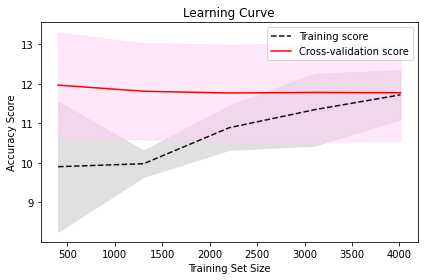

In [28]:
#@title Plotting learning curve
# Create means and standard deviations of training set scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#ff0000", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD", alpha = 0.9)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#ffd1f7" , alpha = 0.5)

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [29]:
#@title Plot Predictions vs Actual (y_test)

print("predictions Dimensions : ", predictions.shape)
print("y_test Dimensions: ", y_test.shape)

predictions Dimensions :  (1505,)
y_test Dimensions:  (1505,)


Text(0, 0.5, 'Tested Porosity')

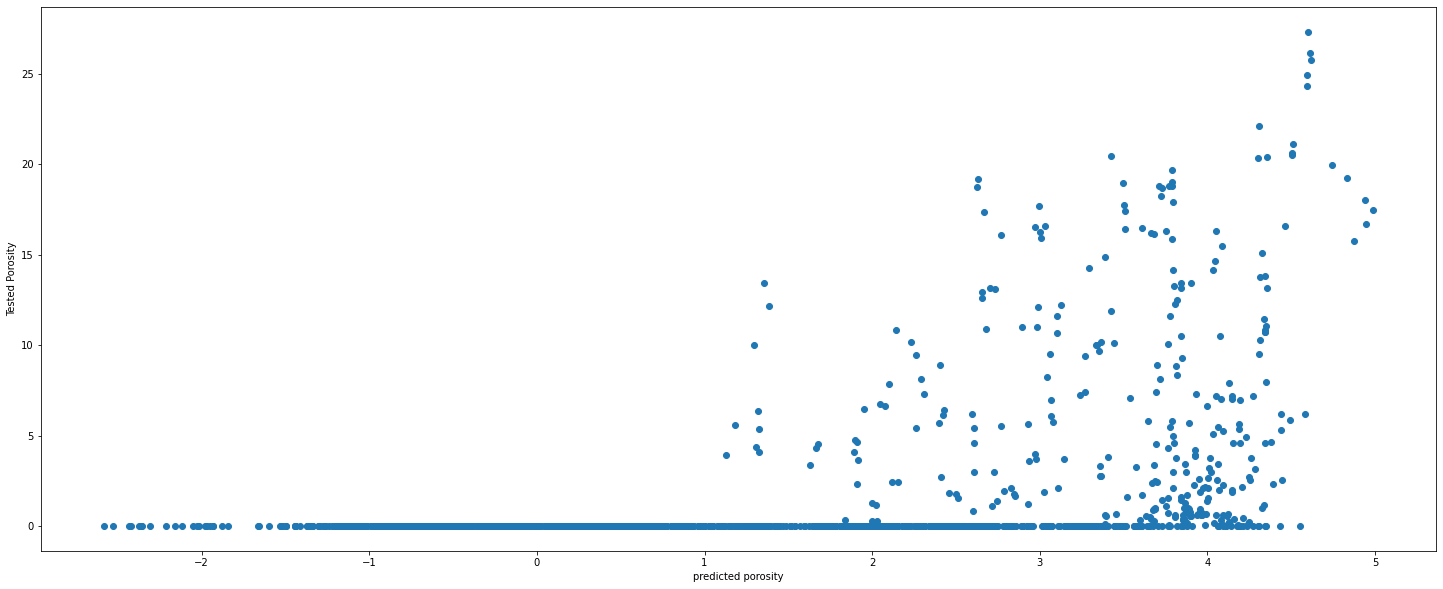

In [30]:
plt.figure(figsize=(25,10))
plt.scatter(predictions,y_test)
plt.xlabel('predicted porosity')
plt.ylabel('Tested Porosity')

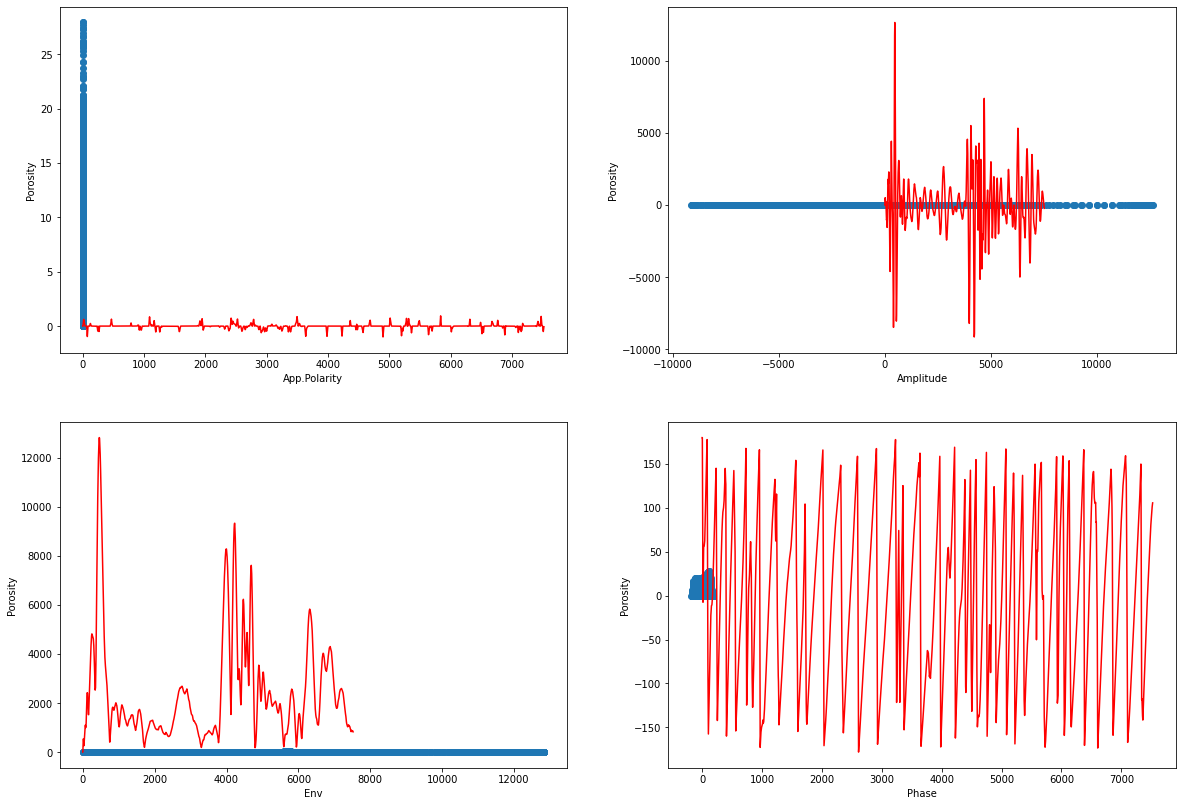

In [38]:
#@title Check model fitted lines against different features
plt.figure(figsize=(20,14))

plt.subplot(2, 2, 1)
plt.scatter(df['App.Polarity'],df['Porosity'])
plt.plot(df['App.Polarity'],'r')
plt.xlabel('App.Polarity')
plt.ylabel('Porosity')

plt.subplot(2, 2, 2)
plt.scatter(df['Amplitude'],df['Porosity'])
plt.plot(df['Amplitude'],'r')
plt.xlabel('Amplitude')
plt.ylabel('Porosity')

plt.subplot(2, 2, 3)
plt.scatter(df['Env'],df['Porosity'])
plt.plot(df['Env'],'r')
plt.xlabel('Env')
plt.ylabel('Porosity')

plt.subplot(2, 2, 4)
plt.scatter(df['Phase'],df['Porosity'])
plt.plot(df['Phase'],'r')
plt.xlabel('Phase')
plt.ylabel('Porosity')
plt.show()

# 'MD', 'Phase', 'Amplitude', 'App.Polarity', 'DomFreq', 'Env','Sweetness', 'Variance'



# Using Min Max Scaler to scale the data 


*   Min Max Scaler is a method to standrize the data to remvoe the effect of the numbers 
*   Min Max Scaler removes the columns names so, we need to put them back 





In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = df[['MD', 'Phase', 'Amplitude', 'App.Polarity', 'DomFreq', 'Env', 'RmsAmp','Sweetness', 'Variance', 'Porosity']]
#scaler.fit(data)
scaled = scaler.fit_transform(data)
scaled = pd.DataFrame(scaled, columns=['MD', 'Phase', 'Amplitude', 'App.Polarity', 'DomFreq', 'Env', 'RmsAmp','Sweetness', 'Variance', 'Porosity'])
scaled

,MD,Phase,Amplitude,App.Polarity,DomFreq,Env,RmsAmp,Sweetness,Variance,Porosity
0,0.0,1.0,0.4,0.5,0.5,0.0,0.0,0.0,0.1,0.0
1,0.0,1.0,0.4,0.5,0.5,0.0,0.0,0.0,0.1,0.0
2,0.0,1.0,0.4,0.5,0.5,0.0,0.0,0.0,0.1,0.0
3,0.0,1.0,0.4,0.5,0.5,0.0,0.0,0.0,0.1,0.0
4,0.0,1.0,0.4,0.5,0.5,0.0,0.0,0.0,0.1,0.0
...,...,...,...,...,...,...,...,...,...,...
7519,1.0,0.8,0.4,0.4,0.2,0.1,0.0,0.1,0.3,0.0
7520,1.0,0.8,0.4,0.4,0.0,0.1,0.0,0.1,0.3,0.0
7521,1.0,0.8,0.4,0.4,0.0,0.1,0.0,0.1,0.3,0.0
7522,1.0,0.8,0.4,0.5,0.0,0.1,0.0,0.1,0.3,0.0


In [87]:
mmdf = scaled[['MD', 'Phase', 'Amplitude', 'App.Polarity', 'DomFreq', 'Env', 'RmsAmp','Sweetness', 'Variance']]
mmy = scaled['Porosity'] 
mmy

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
        ..
7519   0.0
7520   0.0
7521   0.0
7522   0.0
7523   0.0
Name: Porosity, Length: 7524, dtype: float64

In [96]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(mmdf, mmy, test_size=0.2, random_state=101)

#@title Linear Regression model training
lm = LinearRegression()
train_sizes, train_scores, test_scores = learning_curve(estimator=lm,
                                                        X=X_train,
                                                        y=y_train,
                                                        scoring = 'neg_mean_squared_error',
                                                       cv=3)
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
#@title Model evaluation - RMSE
mmpredictions = lm.predict(X_test2)
mmerror=np.sqrt(mean_squared_error(y_test2,mmpredictions)) # rmse
print("RMSE : ",mmerror)

RMSE :  0.12874487316079727


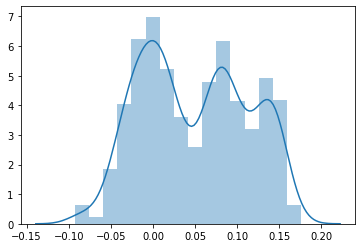

In [98]:
#@title Model evaluation - prediction histogram
sns.distplot(mmpredictions)

In [99]:
#@title Print model coefficients 
print("intercept : ",lm.intercept_)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[idx]))

intercept :  -0.0961419241782958
The coefficient for MD is 0.18768802722217257
The coefficient for Phase is 0.012446133729867637
The coefficient for Amplitude is 0.0029681866624303647
The coefficient for App.Polarity is 0.05175485365653777
The coefficient for DomFreq is -0.0987445432453452
The coefficient for Env is -0.04038959737215753
The coefficient for RmsAmp is 0.21560469802511112
The coefficient for Sweetness is -0.040389597372158866
The coefficient for Variance is 0.10907803501898226


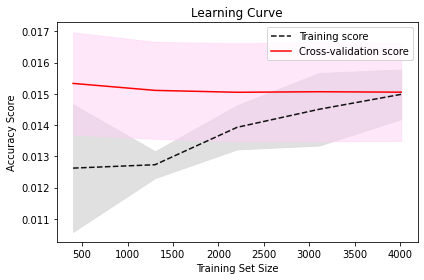

In [100]:
#@title Plotting learning curve
# Create means and standard deviations of training set scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#ff0000", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD", alpha = 0.9)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#ffd1f7" , alpha = 0.5)

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Tested Porosity')

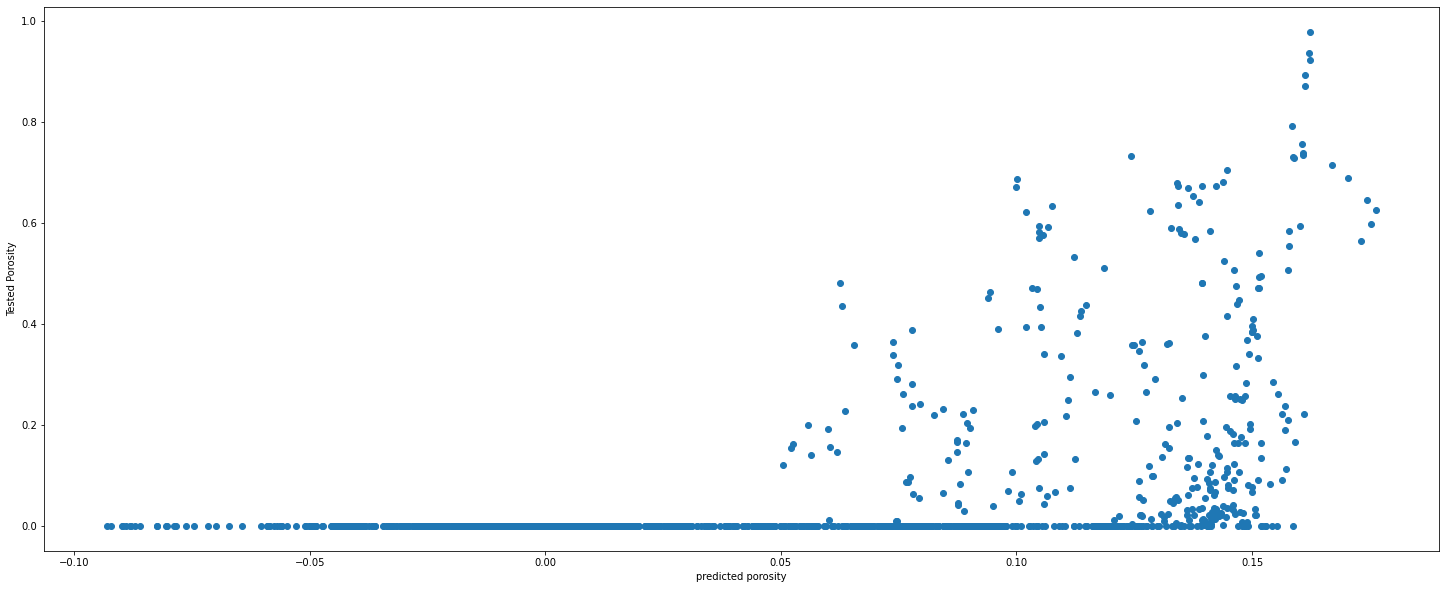

In [101]:
plt.figure(figsize=(25,10))
plt.scatter(mmpredictions,y_test2)
plt.xlabel('predicted porosity')
plt.ylabel('Tested Porosity')

In [ ]:
#@title needs improvement

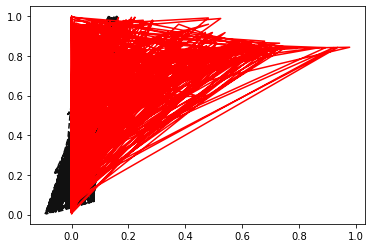

In [108]:
plt.plot(mmpredictions, X_test2['MD'], '--', color="#111111",  label="predicted")
plt.plot(y_test2, X_test2['MD'], color="#ff0000", label="actual")